In [4]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import gzip

In [ ]:
adata_gt=sc.read_h5ad('Data/combined_raw.h5ad')
adata=sc.read_h5ad('Imputed_h5ad/adata_magic_imputed_mf10_run1.h5ad')

c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
#5. QC filtering
# Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# Mitochondrial gene filter
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata = adata[adata.obs.pct_counts_mt < 5, :]  # Keep cells with <5% mito reads
print(f"After QC: {adata.shape}")

After QC: (14746, 1993)


In [10]:
#5. QC filtering
# Basic filtering
sc.pp.filter_cells(adata_gt, min_genes=200)
sc.pp.filter_genes(adata_gt, min_cells=3)

# Mitochondrial gene filter
adata_gt.var['mt'] = adata_gt.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_gt, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata_gt = adata_gt[adata_gt.obs.pct_counts_mt < 5, :]  # Keep cells with <5% mito reads
print(f"After QC: {adata_gt.shape}")

c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


After QC: (14746, 22519)


In [11]:
#Normalization and log transformation 
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata) 

c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [12]:
#Normalization and log transformation 
sc.pp.normalize_total(adata_gt, target_sum=1e4)
sc.pp.log1p(adata_gt)

In [13]:
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000)

In [14]:
sc.pp.highly_variable_genes(adata_gt, flavor='seurat', n_top_genes=2000)

In [15]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

In [16]:
sc.tl.pca(adata_gt, svd_solver='arpack')
sc.pp.neighbors(adata_gt, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_gt)
sc.tl.leiden(adata_gt)

c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


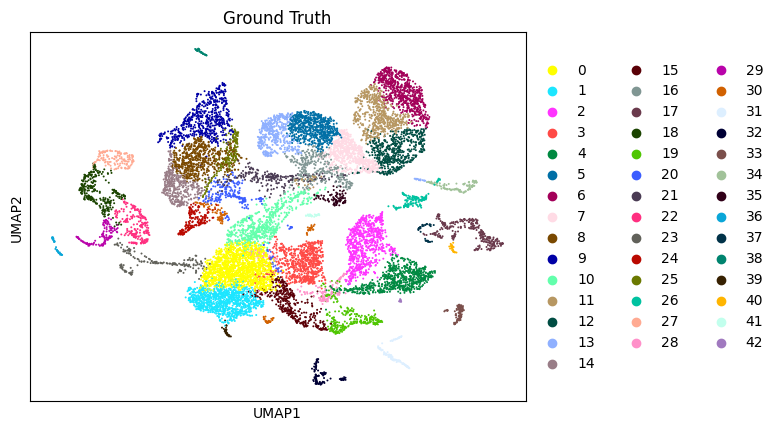

In [17]:
sc.pl.umap(adata, color='leiden', title='Ground Truth', save='_GT_UMAP.png')

c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


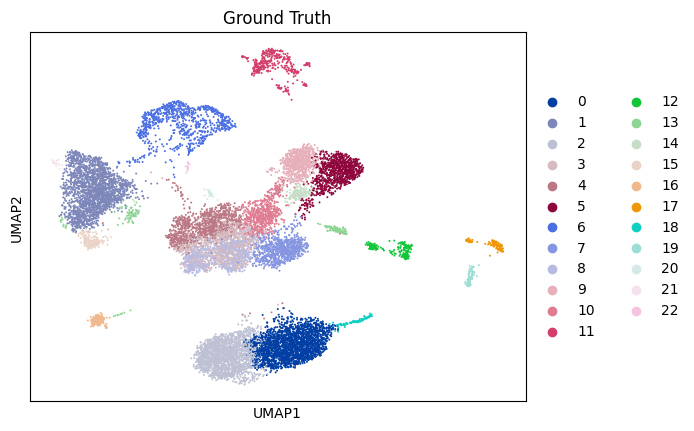

In [19]:
sc.pl.umap(adata_gt, color='leiden', title='Ground Truth', save='_magic10_UMAP.png')

c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


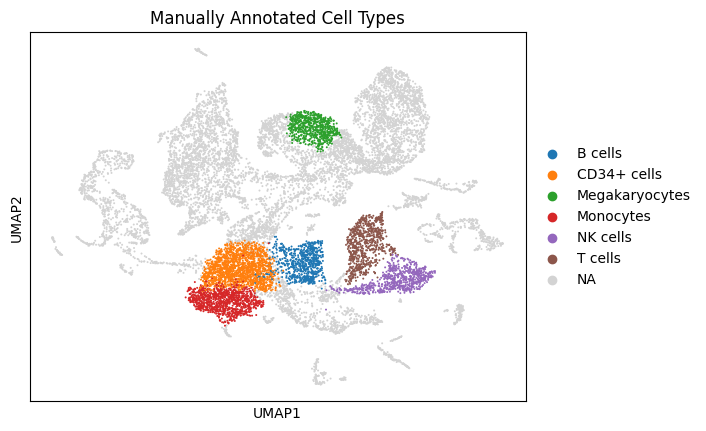

In [22]:
# Example: Map Leiden clusters to cell types manually
cluster_to_celltype = {
    '0': 'CD34+ cells',
    '1': 'Monocytes',
    '2': 'T cells',
    '3': 'B cells',
    '4': 'NK cells',
    '5': 'Megakaryocytes'
}

adata.obs['cell_type'] = adata.obs['leiden'].map(cluster_to_celltype)

# Visualize annotated UMAP
sc.pl.umap(adata, color='cell_type', title='Manually Annotated Cell Types', save='_magic10_Annotated_UMAP.png')


c:\Users\prath\Downloads\ScRnaseq_research\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


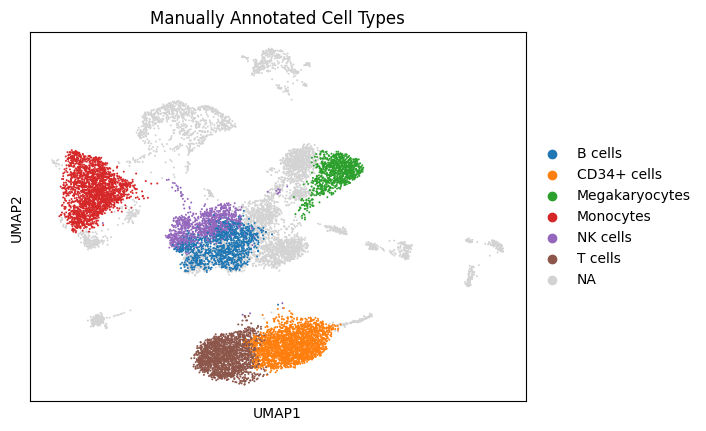

In [23]:
# Example: Map Leiden clusters to cell types manually
cluster_to_celltype = {
    '0': 'CD34+ cells',
    '1': 'Monocytes',
    '2': 'T cells',
    '3': 'B cells',
    '4': 'NK cells',
    '5': 'Megakaryocytes'
}

adata_gt.obs['cell_type'] = adata_gt.obs['leiden'].map(cluster_to_celltype)

# Visualize annotated UMAP
sc.pl.umap(adata_gt, color='cell_type', title='Manually Annotated Cell Types', save='_Annotated_UMAP.png')
